# Proszę zaimplementować rekurencyjne odwracanie macierzy o rozmiarze 2k × 2k wykorzystując swoje rekurencyjne mnożenie macierzy z zadania 1


In [130]:
from random import uniform
import random

### Zmienna globalna do przechowywania ilości operacji

In [131]:
operationCount = 0

### Tworzenie macierzy

In [132]:
def createMatrix(size):
    matrix = []
    for i in range(size):
        matrix.append([])
        for j in range(size):
            matrix[i].append(random.uniform(0, 1))
    return matrix

### Tworzenie macierzy jednostkowej

In [133]:
def createIdentityMatrix(matrix):
    matrixSize = len(matrix)
    matrix = []
    for i in range(matrixSize):
        matrix.append([])
        for j in range(matrixSize):
            if i == j:
                matrix[i].append(1.0)
            else:
                matrix[i].append(0.0)
    return matrix

### Wyświetlenie macierzy

In [134]:
def printMatrix(matrix):
    for row in matrix:
        print(row)

In [135]:
matrix1 = createMatrix(4)
identityMatrix1 = createIdentityMatrix(matrix1)
printMatrix(identityMatrix1)
printMatrix(matrix1)

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]
[0.8981641206648349, 0.2308109538308688, 0.8304852362412584, 0.5121590751183016]
[0.4404126891920288, 0.4195352775371103, 0.5502217976310241, 0.7049646878884763]
[0.7255101689636123, 0.005727984993143309, 0.3998721511118156, 0.41845759079780553]
[0.6070101317275818, 0.6335498860718052, 0.2214749112353579, 0.12143921606254271]


## Tradycyjne odwracanie macierzy

In [136]:
def invertMatrix(AM, IM):
    global operationCount
    newAM = AM.copy()
    for fd in range(len(newAM)):
        fdScaler = 1.0 / newAM[fd][fd]
        for j in range(len(newAM)):
            newAM[fd][j] *= fdScaler
            IM[fd][j] *= fdScaler
            operationCount += 2
        for i in list(range(len(newAM)))[0:fd] + list(range(len(newAM)))[fd+1:]:
            crScaler = newAM[i][fd]
            for j in range(len(AM)):
                newAM[i][j] = newAM[i][j] - crScaler * newAM[fd][j]
                IM[i][j] = IM[i][j] - crScaler * IM[fd][j]
                operationCount += 2
               
    return IM

In [137]:
printMatrix(invertMatrix(matrix1, identityMatrix1))

[-0.5632525449698185, -0.8918628516567899, 1.9660898880657247, 0.778014586711079]
[-0.1556355904721647, 0.6233755702770756, -1.2176164006951171, 1.2333185781409666]
[3.050883260342439, -0.3823736182623829, -2.8482623888428136, -0.8325204702287419]
[-1.9366988257094098, 1.903144932873352, 1.719402648588782, -0.5702374112471956]


## Blokowe odwracanie macierzy

### Operacje macierzowe z wykorzystanie JS

In [138]:
import os
import json

def runJsOperation(matrixA, matrixB, jsFileName, dummyOperation=False, counting=False):
    global operationCount
    fileName1 = 'matrix1.json'
    fileName2 = 'matrix2.json'
    resultFileName = 'resMatrix.json'
    for matrix, fileName in [(matrixA, fileName1), (matrixB, fileName2)]:   
        with open(fileName, 'w') as file:
            matrixJson = json.dumps(matrix)
            file.write(matrixJson)
    os.system(f"node {jsFileName} {fileName1} {fileName2} {resultFileName} {dummyOperation} {counting} 8")
    
    with open(resultFileName, 'r') as file:
        resultJson = json.load(file)
        if counting:
            matrix, operations = resultJson
            operationCount += operations
            return matrix
        return resultJson

def multiplyMatricesWithJs(matrixA, matrixB):
    return runJsOperation(matrixA, matrixB, './js/hybridMultiplication.js')
    
def addMatricesWithJs(matrixA, matrixB):
    return runJsOperation(matrixA, matrixB, './js/add.js')

def multiplyMatricesWithJsWithCounting(matrixA, matrixB):
    return runJsOperation(matrixA, matrixB, './js/hybridMultiplication.js', counting=True)
    
def addMatricesWithJsWithCounting(matrixA, matrixB):
    return runJsOperation(matrixA, matrixB, './js/add.js', counting=True)

def dummyOperation(matrixA, matrixB):
    return runJsOperation(matrixA, matrixB, './js/hybridMultiplication.js', dummyOperation=True)
    

In [139]:
matrixA = createMatrix(4)

In [140]:
printMatrix(matrixA)
multiplyMatricesWithJsWithCounting(matrixA, matrixA)

[0.3021677491050121, 0.9764122923024043, 0.6489582078508461, 0.6893810171280421]
[0.07507970884683002, 0.7226187401857346, 0.15273114281725808, 0.21818453425635498]
[0.48644163946637553, 0.004077537988224966, 0.9266825749323434, 0.6164207774098012]
[0.4766693318240389, 0.16427303848910135, 0.6176457454176215, 0.15307938982687985]


[[0.8089011825984467,
  1.1165069912345242,
  1.3723943214691863,
  0.9269081199095688],
 [0.2552373349140304,
  0.6319511977185919,
  0.4353840173065558,
  0.33696896448656977],
 [0.8918989867388704,
  0.5829539991220489,
  1.5557733268463734,
  1.0018209976500505],
 [0.5297845304409956,
  0.6117978615631674,
  1.0013384678177986,
  0.7686115953441772]]

### Funkcje pomocnicze

In [141]:
import copy

def splitMatrixIntoFourParts(matrix):
    length = len(matrix)
    firstHalf = matrix[0:length//2]
    secondHalf = matrix[length//2:]
    firstQuarter = [x[0:length//2] for x in firstHalf]
    secondQuarter = [x[length//2:] for x in firstHalf]
    thirdQuarter = [x[0:length//2] for x in secondHalf]
    fourthQuarter = [x[length//2:] for x in secondHalf]
    return (firstQuarter, secondQuarter, thirdQuarter, fourthQuarter)

def joinMatrixFromFourParts(first, second, third, fourth):
    firstHalf = [x + y for (x,y) in zip(first, second)]
    secondHalf = [x + y for (x,y) in zip(third, fourth)]
    return firstHalf + secondHalf

def invertSmallMatrix(matrix):
    identityMatrix = createIdentityMatrix(matrix)
    copiedMatrix = copy.deepcopy(matrix)
    return invertMatrix(copiedMatrix, identityMatrix)

def negateMatrix(matrix):
    if(len(matrix) == 1): 
        return [[-matrix[0][0]]]
    return list(map(lambda x: list(map(lambda y: -y, x)), matrix))


### Blokowa inwersja macierzy

In [142]:
def invertMatrixBlock(matrix, multiply, add):
    def invertMatrixBlockRecur(matrix):  
        if(len(matrix) <= 2):
            return invertSmallMatrix(matrix)
        resultMatrix = None

        A11, A12, A21, A22 = splitMatrixIntoFourParts(matrix)
        invertedA11 = invertMatrixBlockRecur(A11)
        S22 = add(A22, negateMatrix(multiply(multiply(A21, invertedA11), A12)))
        invertedS22 = invertMatrixBlockRecur(S22)

        tempResult = multiply(multiply(multiply(A12, invertedS22), A21), invertedA11)
        B11 = multiply(invertedA11, add(createIdentityMatrix(tempResult), tempResult))

        B12 = multiply(multiply(negateMatrix(invertedA11), A12), invertedS22)
        B21 = multiply(multiply(negateMatrix(invertedS22), A21), invertedA11)
        B22 = invertedS22
        resultMatrix = joinMatrixFromFourParts(B11, B12, B21, B22)
        return resultMatrix
    return invertMatrixBlockRecur(matrix)

                            

### Testy poprawności odwracania macierzy

In [143]:
matrixA = createMatrix(8)
printMatrix(matrixA)

[0.33325328300696055, 0.454102804132247, 0.3090809934423714, 0.8027899287892664, 0.7703574594779014, 0.5005920487186658, 0.6824776138164151, 0.6517994983390504]
[0.5551824265323151, 0.6048226351209869, 0.7380391201661555, 0.5139849016803489, 0.40013909540424264, 0.2760083515381908, 0.662552710519326, 0.18580527295618465]
[0.6784951369464165, 0.17354187512985864, 0.7133074885525275, 0.5096787949736592, 0.8838091502629447, 0.5239064384570482, 0.00693814564731321, 0.07141280758403645]
[0.5450944291483685, 0.5056795465672961, 0.21422098976744164, 0.6384594706894903, 0.7022067995490284, 0.4037177243534458, 0.23507141463366676, 0.5050606960156195]
[0.6667398343221987, 0.6527988697489534, 0.0899414880227285, 0.5503775934051555, 0.05478048627779308, 0.5054933422586406, 0.48808973743441164, 0.4498338353934772]
[0.9827836627162239, 0.7846702343066272, 0.16636696091222247, 0.1132211992886577, 0.17069868533572563, 0.5053192248978399, 0.009670573114522019, 0.27110132741958215]
[0.32388784936164916,

In [144]:
matrixA

[[0.33325328300696055,
  0.454102804132247,
  0.3090809934423714,
  0.8027899287892664,
  0.7703574594779014,
  0.5005920487186658,
  0.6824776138164151,
  0.6517994983390504],
 [0.5551824265323151,
  0.6048226351209869,
  0.7380391201661555,
  0.5139849016803489,
  0.40013909540424264,
  0.2760083515381908,
  0.662552710519326,
  0.18580527295618465],
 [0.6784951369464165,
  0.17354187512985864,
  0.7133074885525275,
  0.5096787949736592,
  0.8838091502629447,
  0.5239064384570482,
  0.00693814564731321,
  0.07141280758403645],
 [0.5450944291483685,
  0.5056795465672961,
  0.21422098976744164,
  0.6384594706894903,
  0.7022067995490284,
  0.4037177243534458,
  0.23507141463366676,
  0.5050606960156195],
 [0.6667398343221987,
  0.6527988697489534,
  0.0899414880227285,
  0.5503775934051555,
  0.05478048627779308,
  0.5054933422586406,
  0.48808973743441164,
  0.4498338353934772],
 [0.9827836627162239,
  0.7846702343066272,
  0.16636696091222247,
  0.1132211992886577,
  0.17069868533572

In [148]:
invertedMatrixBlockValue = invertMatrixBlock(matrixA, multiplyMatricesWithJs, addMatricesWithJs)

In [149]:
copiedMatrix = copy.deepcopy(matrixA)
invertedMatrixTraditionalValue = invertMatrix(copiedMatrix, createIdentityMatrix(copiedMatrix))

In [150]:
print(sum([sum(x) for x in addMatricesWithJs(negateMatrix(invertedMatrixBlockValue), invertedMatrixTraditionalValue)]))

-6.938893903907228e-17


## Testy wydajności rozwiązania

In [178]:
matrixSizes = [2**i for i in range(1,9)]
matrices = [createMatrix(i) for i in matrixSizes]

In [179]:
def dummyInvertMatrixBlock(matrix):
    if(len(matrix) <= 2):
        return matrix
    
    A11, A12, A21, A22 = splitMatrixIntoFourParts(matrix)
    invertedA11 = dummyInvertMatrixBlock(A11)
    S22 = dummyOperation(A22, dummyOperation(dummyOperation(A21, invertedA11), A12))
    invertedS22 = dummyInvertMatrixBlock(S22)
    
    tempResult = dummyOperation(dummyOperation(dummyOperation(A12, invertedS22), A21), invertedA11)
    B11 = dummyOperation(invertedA11, dummyOperation(createIdentityMatrix(tempResult), tempResult))
    
    B12 = dummyOperation(dummyOperation(invertedA11, A12), invertedS22)
    B21 = dummyOperation(dummyOperation(invertedS22, A21), invertedA11)
    B22 = invertedS22
    
    return joinMatrixFromFourParts(B11, B12, B21, B22)

In [180]:
import time
def calculateRunningTime(matrix):
    start_time = time.time()
    invertMatrixBlock(matrix, multiplyMatricesWithJs, addMatricesWithJs)
    return (time.time() - start_time) * 1000

def calculateTraditionalRunningTime(matrix):
    start_time = time.time()
    invertSmallMatrix(matrix)
    return (time.time() - start_time) * 1000

def calculateDummyRunningTime(matrix):
    start_time = time.time()
    dummyInvertMatrixBlock(matrix)
    return (time.time() - start_time) * 1000

def calculateOperations(matrix):
    global operationCount
    operationCount = 0
    invertMatrixBlock(matrix, multiplyMatricesWithJsWithCounting, addMatricesWithJsWithCounting)
    return operationCount

def calculateTraditionalOperations(matrix):
    global operationCount
    operationCount = 0
    invertSmallMatrix(matrix)
    return operationCount

### Pomiar czasu wykonania odwracania macierzy

In [181]:
matrixTimes = [calculateRunningTime(matrix) for matrix in matrices]

In [182]:
matrixDummyTimes = [calculateDummyRunningTime(matrix) for matrix in matrices]

In [183]:
matrixTraditionalTimes = [calculateTraditionalRunningTime(matrix) for matrix in matrices]

### Wykres czasu wykonania

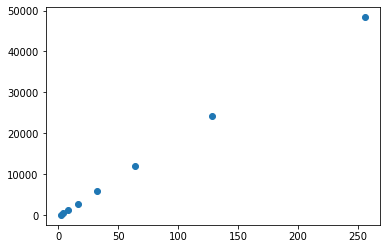

In [184]:
import matplotlib.pyplot as plt


plt.scatter(matrixSizes, matrixTimes)
plt.show()

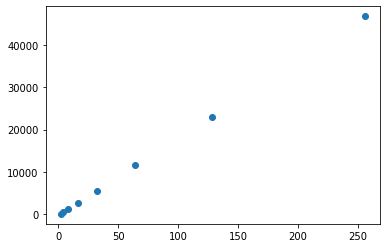

In [185]:
plt.scatter(matrixSizes, matrixDummyTimes)
plt.show()

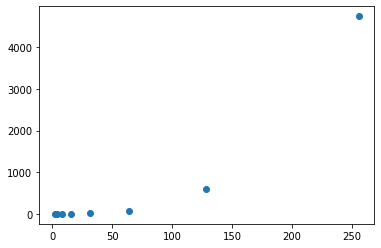

In [186]:
plt.scatter(matrixSizes, matrixTraditionalTimes)
plt.show()

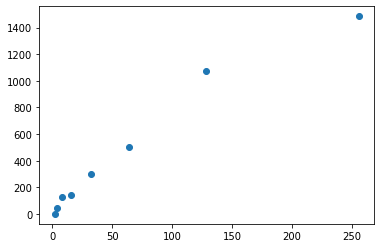

In [187]:
plt.scatter(matrixSizes, [matrixTimes[i] - matrixDummyTimes[i] for i in range(len(matrixTimes))])
plt.show()

In [169]:
matrixExtraSizes = [2**i for i in range(1,11)]
matricesExtra = [createMatrix(i) for i in matrixExtraSizes]
matrixExtraTraditionalTimes = [calculateTraditionalRunningTime(matrix) for matrix in matricesExtra]

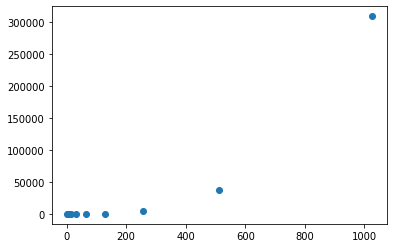

In [170]:
plt.scatter(matrixExtraSizes, matrixExtraTraditionalTimes)
plt.show()

### Pomiar ilości wykonywanych operacji


In [176]:
matrixOperations = [calculateOperations(matrix) for matrix in matrices]

In [172]:
matrixTraditionalOperations = [calculateTraditionalOperations(matrix) for matrix in matrices]

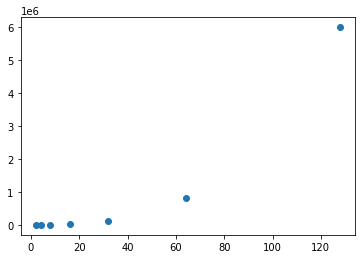

In [177]:
plt.scatter(matrixSizes, matrixOperations)
plt.show()

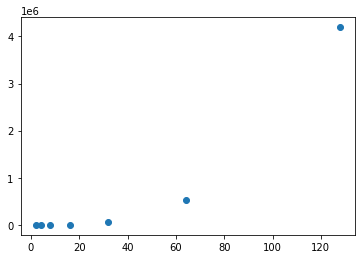

In [174]:
plt.scatter(matrixSizes, matrixTraditionalOperations)
plt.show()